In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def delta_seq(patterns,targets,W,lr):
    for i in range(0,patterns.shape[0]):
        delta=-lr*np.dot((np.dot(patterns[i,:],W)-targets[i]),patterns[i,:])
        W += delta
    return W

def step(x):
    return 1 if x>0 else 0

def perceptron_seq(patterns,targets,W,lr):
    for i in range(0,patterns.shape[0]):
        delta=-lr*np.dot((step(np.dot(patterns[i,:],W)>0)-targets[i]),patterns[i,:])
        W += delta
    return W

def delta_batch(patterns,targets,W,lr):
    delta=-lr*np.matmul((np.matmul(patterns,W)-targets),patterns)
    return W + delta

In [13]:
def plot_boundary(W):
    t=np.linspace(-3,3)
    plt.plot(t,((W[0]*t+W[2])/W[1]))

Initalize stuff

[[ 2.18499544  3.79545918  2.38039517 -1.71495159 -1.74369044]
 [ 2.00858888  1.77055024  3.93352845 -1.206147   -1.5959963 ]
 [ 1.          1.          1.          1.          1.        ]]
[ 1.  1.  1. -1. -1.]


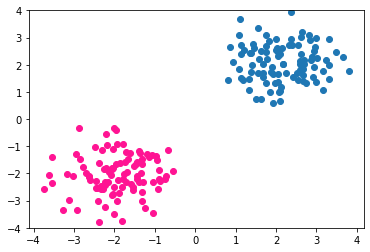

In [53]:
# Parameters
lr=0.001
epochs=20
W=np.random.normal(0,1,3)

# Create and plot dataset
data = np.ones((3,200))
data[0:2,:100] = np.random.multivariate_normal([2,2],[[0.5,0],[0,0.5]],100).T
data[0:2,100:] = np.random.multivariate_normal([-2,-2],[[0.5,0],[0,0.5]],100).T
plt.scatter(data[0,:100],data[1,:100])
plt.ylim(-4,4)
plt.scatter(data[0,100:],data[1,100:],c='deeppink')

target=np.ones((1,200))
target[0,100:]=-1

np.random.seed(42)
p = np.random.permutation(target.shape[1])
data = data[:,p]
target = target[0,p]


In [ ]:
W_delta_seq = W
W_perceptron_seq = W
W_delta_batch = W
for lr in [0.001,0.01,0.1,0.5]:
    for _ in range(epochs):
        W_delta_seq = delta_seq(data,target,W_delta_seq,lr)
        W_perceptron_seq = perceptron_seq(data,target,W_perceptron_seq,lr)
        W_delta_batch = delta_batch(data,target,W_delta_batch,lr)
        
        next_output=np.matmul(data,new_weight)
        output_w=delta_sequent(epochs,data,target,W)